In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.model_selection import train_test_split

In [79]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [80]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 4 classes.


In [81]:
class_names = dataset.class_names
class_names

['.ipynb_checkpoints',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [82]:
len(dataset)

68

In [83]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 2 1 1 1 2 2 1 2 1 1 1 1 1 3 2 2 2 2 1 1 2 1 1 1 1 3 2 1 1 3 1]


In [84]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[ 99.  91. 104.]
  [ 99.  91. 104.]
  [100.  92. 105.]
  ...
  [146. 138. 151.]
  [145. 137. 150.]
  [146. 138. 151.]]

 [[ 99.  91. 104.]
  [100.  92. 105.]
  [102.  94. 107.]
  ...
  [146. 138. 151.]
  [146. 138. 151.]
  [147. 139. 152.]]

 [[110. 102. 115.]
  [112. 104. 117.]
  [115. 107. 120.]
  ...
  [145. 137. 150.]
  [147. 139. 152.]
  [149. 141. 154.]]

 ...

 [[106.  98. 113.]
  [108. 100. 115.]
  [105.  97. 112.]
  ...
  [156. 148. 161.]
  [158. 150. 163.]
  [159. 151. 164.]]

 [[115. 107. 122.]
  [114. 106. 121.]
  [108. 100. 115.]
  ...
  [150. 142. 155.]
  [154. 146. 159.]
  [157. 149. 162.]]

 [[ 87.  79.  94.]
  [104.  96. 111.]
  [117. 109. 124.]
  ...
  [149. 141. 154.]
  [154. 146. 159.]
  [157. 149. 162.]]], shape=(256, 256, 3), dtype=float32)


In [85]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[173. 171. 182.]
  [171. 169. 180.]
  [171. 169. 180.]
  ...
  [191. 189. 200.]
  [186. 184. 195.]
  [181. 179. 190.]]

 [[169. 167. 178.]
  [167. 165. 176.]
  [167. 165. 176.]
  ...
  [190. 188. 199.]
  [187. 185. 196.]
  [183. 181. 192.]]

 [[166. 164. 175.]
  [166. 164. 175.]
  [165. 163. 174.]
  ...
  [192. 190. 201.]
  [190. 188. 199.]
  [187. 185. 196.]]

 ...

 [[135. 132. 141.]
  [125. 122. 131.]
  [132. 129. 138.]
  ...
  [136. 135. 143.]
  [148. 147. 155.]
  [148. 147. 155.]]

 [[141. 138. 147.]
  [145. 142. 151.]
  [152. 149. 158.]
  ...
  [144. 143. 151.]
  [153. 152. 160.]
  [178. 177. 185.]]

 [[134. 131. 140.]
  [122. 119. 128.]
  [133. 130. 139.]
  ...
  [166. 165. 173.]
  [147. 146. 154.]
  [159. 158. 166.]]]


In [86]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


(256, 256, 3)


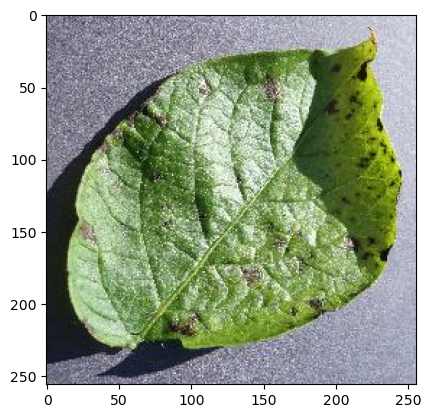

In [87]:
for image_batch,label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    
    print(image_batch[0].shape)

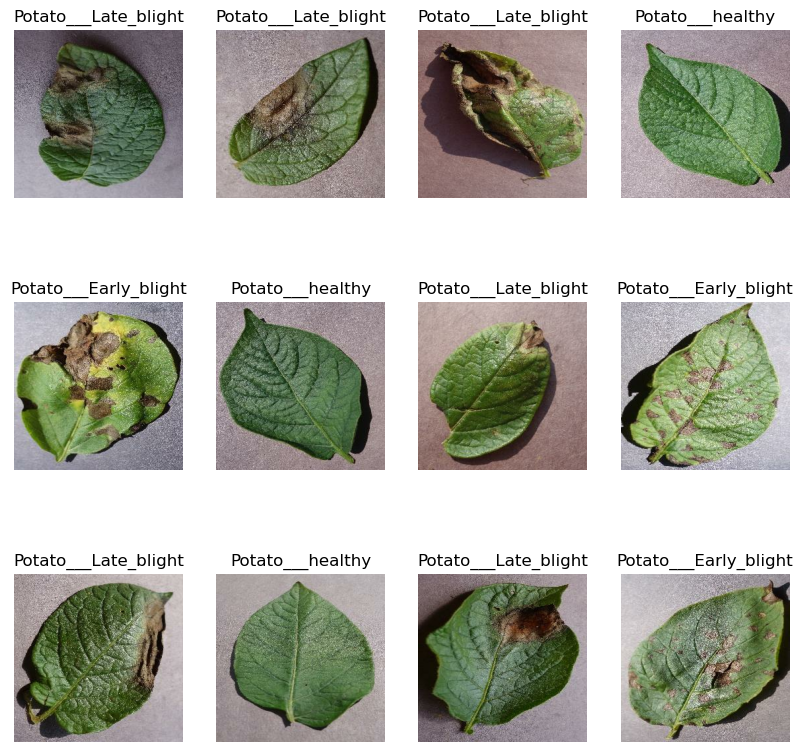

In [88]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [89]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test

In [90]:
train_size = 0.8
len(dataset)*train_size
#dataset.take(10)

54.400000000000006

In [91]:
train_ds = dataset.take(54)
len(train_ds)

54

In [92]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [93]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [94]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [95]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [96]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [97]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [98]:
len(train_ds)

54

In [99]:
len(val_ds)

6

In [100]:
len(test_ds)

8

In [101]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [102]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# data_augmentation

In [103]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [104]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
        
])

model.build(input_shape = input_shape)

In [105]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [106]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [107]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 65s 1s/step - loss: 0.9378 - accuracy: 0.4942 - val_loss: 0.8087 - val_accuracy: 0.5625
Epoch 2/50
54/54 [==============================] - 62s 1s/step - loss: 0.6985 - accuracy: 0.6979 - val_loss: 1.2166 - val_accuracy: 0.6146
Epoch 3/50
54/54 [==============================] - 71s 1s/step - loss: 0.4705 - accuracy: 0.7882 - val_loss: 0.2917 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 93s 2s/step - loss: 0.3409 - accuracy: 0.8553 - val_loss: 0.4452 - val_accuracy: 0.7500
Epoch 5/50
54/54 [==============================] - 104s 2s/step - loss: 0.2968 - accuracy: 0.8791 - val_loss: 0.2407 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 97s 2s/step - loss: 0.2569 - accuracy: 0.8964 - val_loss: 0.1680 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 90s 2s/step - loss: 0.1903 - accuracy: 0.9196 - val_loss: 0.1260 - val_accuracy: 0.9427
Epoch 8/50
54/54 [=

In [108]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 198ms/step - loss: 0.0141 - accuracy: 0.9961


In [109]:
scores

[0.014115617610514164, 0.99609375]

In [110]:
history

In [111]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [112]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [113]:
history.history['accuracy']

[0.49421295523643494,
 0.6979166865348816,
 0.7881944179534912,
 0.8553240895271301,
 0.8790509104728699,
 0.8964120149612427,
 0.9195601940155029,
 0.9085648059844971,
 0.9415509104728699,
 0.9004629850387573,
 0.9270833134651184,
 0.9375,
 0.9386574029922485,
 0.9664351940155029,
 0.9589120149612427,
 0.9618055820465088,
 0.9693287014961243,
 0.9618055820465088,
 0.9444444179534912,
 0.9774305820465088,
 0.9739583134651184,
 0.9785879850387573,
 0.9502314925193787,
 0.9866898059844971,
 0.9855324029922485,
 0.9884259104728699,
 0.9872685074806213,
 0.984375,
 0.9716435074806213,
 0.9918981194496155,
 0.9861111044883728,
 0.9895833134651184,
 0.9855324029922485,
 0.9866898059844971,
 0.9837962985038757,
 0.9849537014961243,
 0.9878472089767456,
 0.9849537014961243,
 0.9884259104728699,
 0.9866898059844971,
 0.9872685074806213,
 0.9872685074806213,
 0.9930555820465088,
 0.9884259104728699,
 0.9809027910232544,
 0.9918981194496155,
 0.9971064925193787,
 0.9930555820465088,
 0.9450231194

In [114]:
len(history.history['accuracy'])

50

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

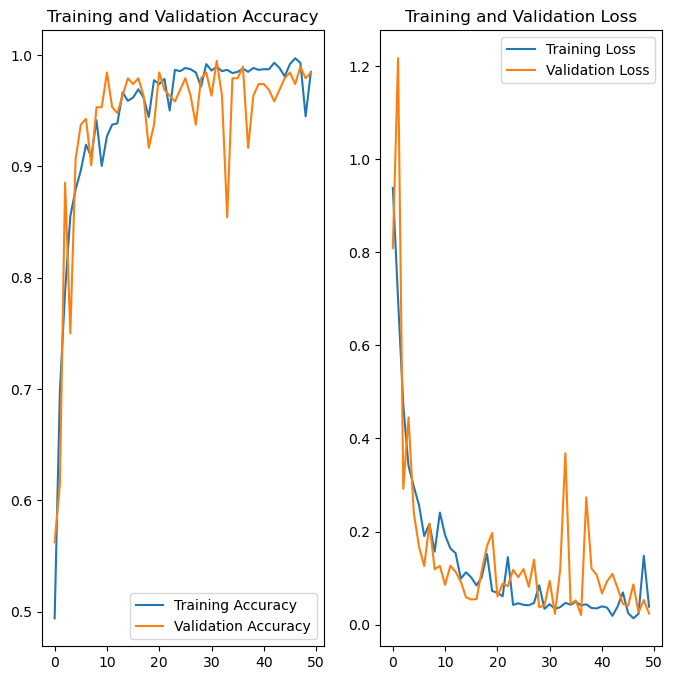

In [117]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [127]:
np.argmax([7.9601382e-16, 6.7817336e-07, 9.9999928e-01, 6.9536759e-09])

2

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 199ms/step
Predicted Label: Potato___Late_blight


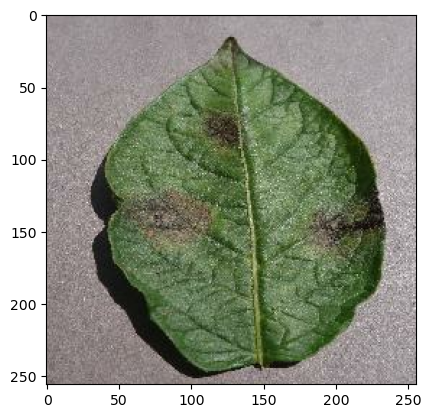

In [129]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [130]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


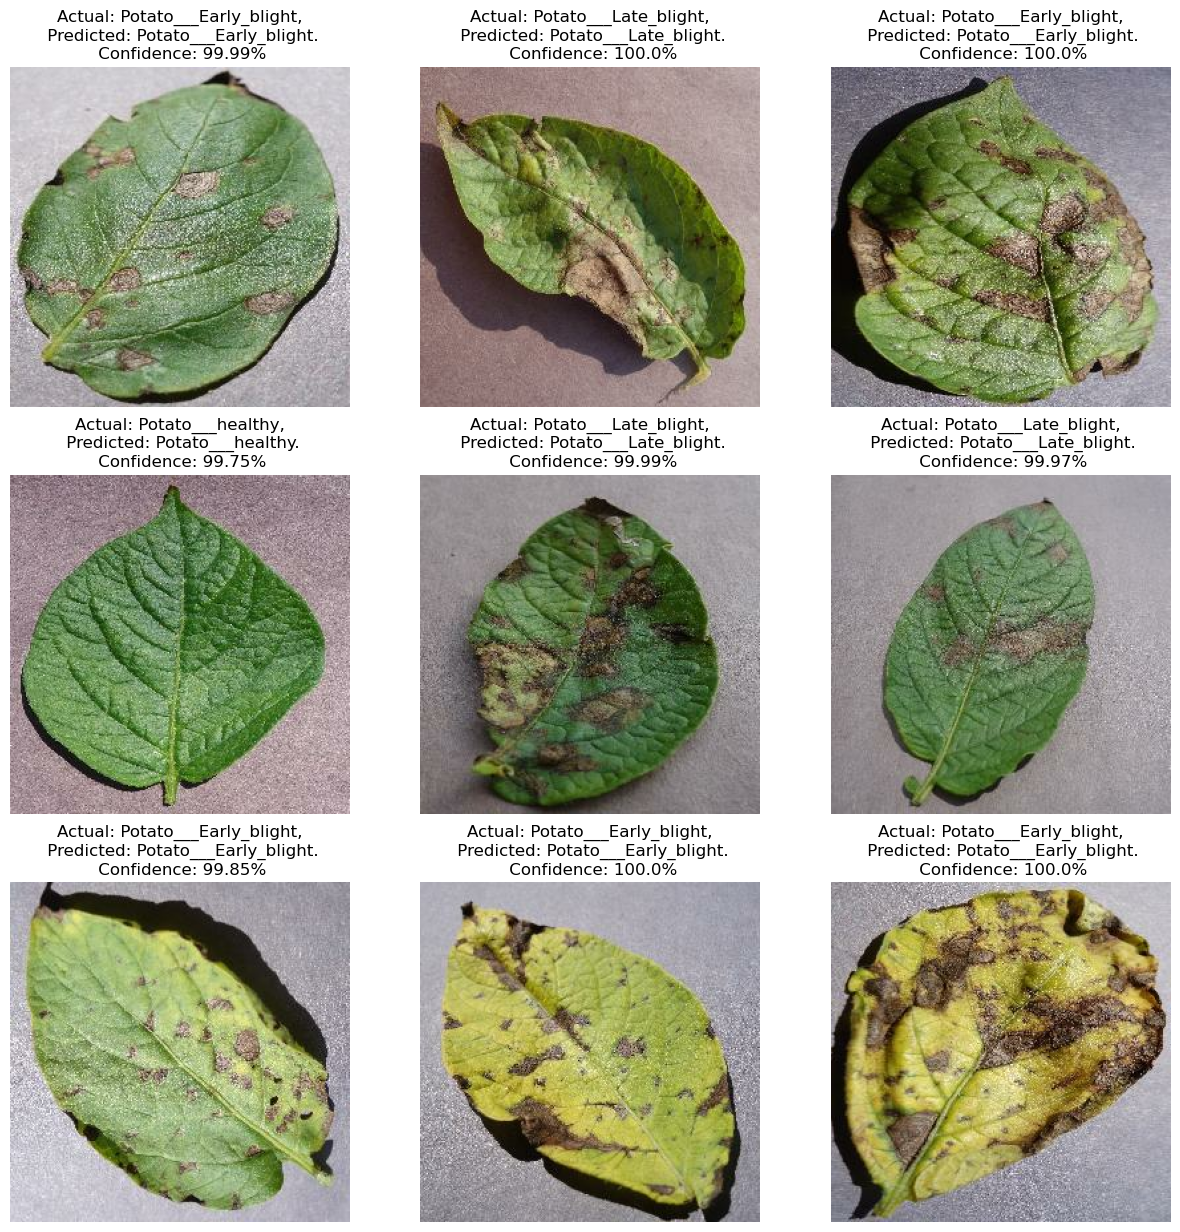

In [136]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    

In [146]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


## HomeWork do tomato disease detection